In [21]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
# Conexión a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Cargar imágenes
apple_image = load_img('/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits/FreshApple/freshApple (1).jpg', target_size=(150, 150))
mango_image = load_img('/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits/FreshMango/freshMango (1).png', target_size=(150, 150))

In [29]:
# Convertir imágenes a arrays
apple_array = img_to_array(apple_image)
mango_array = img_to_array(mango_image)

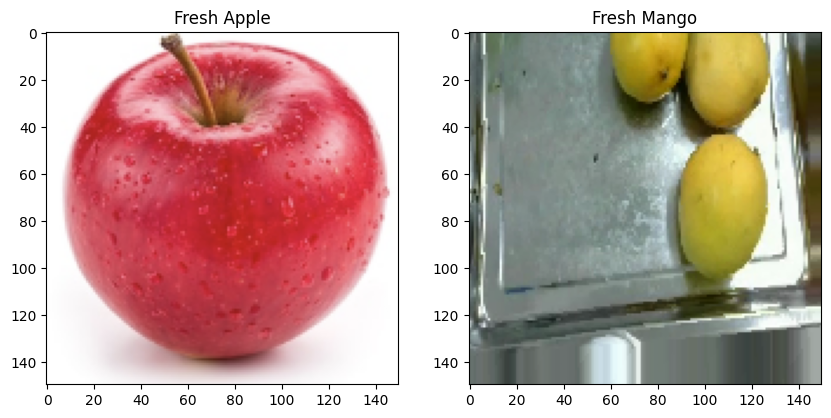

In [30]:
# Normalizar los valores entre 0 y 1
apple_array /= 255.0
mango_array /= 255.0

# Mostrar las imágenes cargadas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(apple_array)
plt.title('Fresh Apple')

plt.subplot(1, 2, 2)
plt.imshow(mango_array)
plt.title('Fresh Mango')

plt.show()

In [31]:
# Generador de datos con aumento para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Cargar imágenes
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits',  # Carpeta con imágenes
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Múltiples clases
)

Found 6028 images belonging to 10 classes.


In [35]:
from tensorflow.keras import layers, models

# Red neuronal convolucional (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases: 5 frutas y 5 vegetales
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo con el generador de datos
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_steps=50
)

Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4447 - loss: 1.6011
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5895 - loss: 1.1634


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [34]:
print(train_generator.num_classes)

10
